# VAR - Reduced Form

In [2]:
## import all the modules need to be used
import statsmodels 
import statsmodels.tsa.stattools as tsa
import statsmodels.api as sm
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import matplotlib.pylab
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## Quick demo of how to run VAR - Reduced form

In [ ]:
## load sample data  -- Thailand inflation data from 2003m1 to 2014m12
df = pd.read_csv('../data/M5-Part I_VAR_Workfile_CAN.csv')
df['time'] = pd.to_datetime(df.dateid01)
df.index = df['time']
df.drop(['dateid','dateid01','lgdp_gap','lgdp'],axis = 1,inplace=True)   ## delete lgdp_gap, we will cancluate it ourselves

In [ ]:
### some data transformation, calculate lgdp_gap 
df['lgdp'] = np.log(df.gdp)
cycle,trend = sm.tsa.filters.hpfilter(df.lgdp,1600)
df['lgdp_gap'] = cycle
df['lgdp_trend'] = trend
df.head()

In [26]:
## prepare the VAR data 
## there are missing data for infl in the begaining, we need to drop na, eview does the same thing impliciately
data = df[['lgdp_gap','infl','rer_gap','mpr']]['1993-01-01':'2012-10-01'].dropna()

## run VAR model 
VAR_model = sm.tsa.VAR(data)
res = VAR_model.fit(2)

In [27]:
## see the summary results, it is the same as eviews output 
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, Oct, 2016
Time:                     16:57:22
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -9.02746
Nobs:                     74.0000    HQIC:                  -9.70122
Log likelihood:          -8.51650    FPE:                3.93301e-05
AIC:                     -10.1484    Det(Omega_mle):     2.48508e-05
--------------------------------------------------------------------
Results for equation lgdp_gap
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.001852         0.004244           -0.436           0.664
L1.lgdp_gap         1.326326         0.134497            9.861           0.000
L1.infl            -0.003931         0.001857           -2.117   

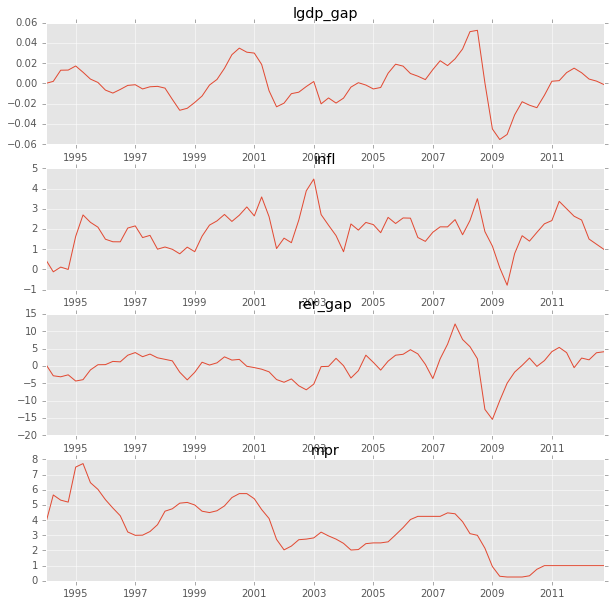

In [30]:
## take a look the input series 
res.plot()

### How to determine what is the correct lag length

1. you can take a look at the auto corrolation for all the independent variables 

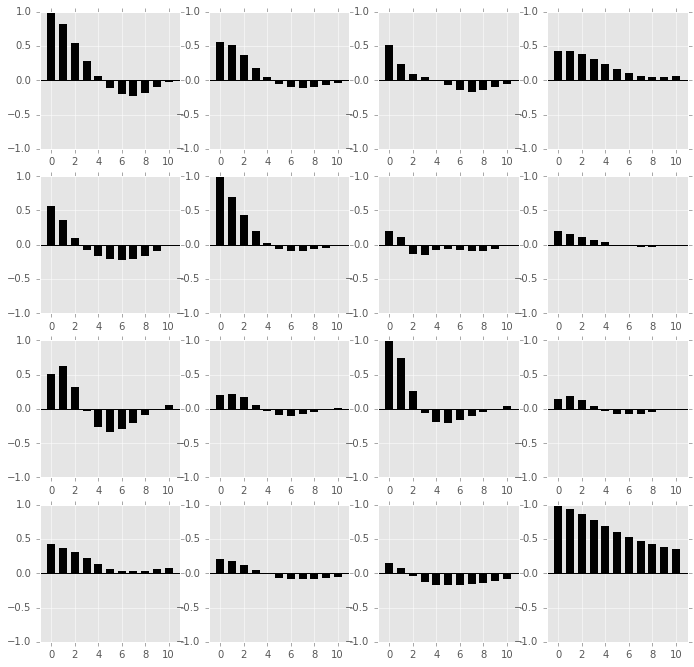

In [31]:
## auto corrolation tables
res.plot_acorr()
# looks lik most of them, after 2 or 3 lags, things die down

In [32]:
## formally, you can use auto select functions 
## usually if you have monthly data, test 12, quarterly data test 4
VAR_model.select_order(4)

## from this result, i will probably just use 2 lags 

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -5.029       -4.903     0.006542       -4.979
1       -9.782       -9.149    5.653e-05       -9.530
2       -10.31      -9.175*    3.337e-05      -9.860*
3       -10.31       -8.668    3.375e-05       -9.658
4      -10.53*       -8.383   2.762e-05*       -9.677
* Minimum



{'aic': 4, 'bic': 2, 'fpe': 4, 'hqic': 2}

## How to test the stationarity of VAR model

In [ ]:
## the var result object will return roots, we can plot them 
## to make it the same as Eview, we will take the inverse of it, and see if all of them are inside the unit circly
roots_inve = 1/res.roots
unit_circle = plt.Circle((0, 0), 1, color='r',fill=False)

fig,ax = plt.subplots(figsize=(6,6))
plt.axis([-2, 2, -2, 2])
ax.scatter(roots_inve.real,roots_inve.imag)
ax.add_artist(unit_circle)

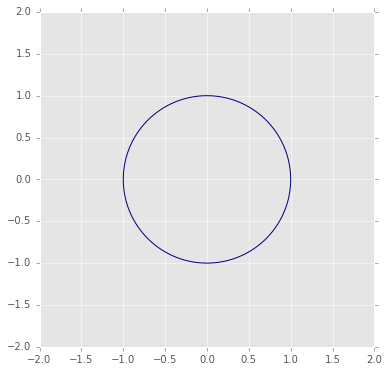

In [40]:
def Circle(x,y):
    return (x*x+y*y)

xx=np.linspace(-2,2,400)
yy=np.linspace(-2,2,400)
[X,Y]=np.meshgrid(xx,yy)

Z=Circle(X,Y)

plt.figure(figsize=(6,6))
plt.contour(X,Y,Z,[1],color='grey')
plt.show()

In [ ]:
print "hello"